In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

In [18]:
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

In [19]:
#First, it's a good idea to take a look at the data:
print(observations.head())
print(species_info.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [20]:
print(observations.describe())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [21]:

print(species_info.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [22]:
#count the number of unique animal species observed in each national park
park_biodiversity = observations.groupby('park_name')['scientific_name'].nunique()
print(park_biodiversity)


park_name
Bryce National Park                    5541
Great Smoky Mountains National Park    5541
Yellowstone National Park              5541
Yosemite National Park                 5541
Name: scientific_name, dtype: int64


There are equal observations collected from each of the four parks. All four parks have 5541 observations recorded.

In [23]:
#Determine the most frequently observed animal species in each national park.
# Group observations by park_name and scientific_name, and count the number of observations
park_species_observations = observations.groupby(['park_name', 'scientific_name'])['observations'].sum().reset_index()

# Pivot the data to create a matrix of observations by park and species
park_species_matrix = park_species_observations.pivot(index='park_name', columns='scientific_name', values='observations')

# Find the most frequently observed species in each park
most_observed_species = park_species_matrix.idxmax(axis=1)

print(most_observed_species)

park_name
Bryce National Park                            Columba livia
Great Smoky Mountains National Park    Streptopelia decaocto
Yellowstone National Park                     Holcus lanatus
Yosemite National Park                  Hypochaeris radicata
dtype: object


In [24]:
#Count the number of unique animal species in each category
# Group species by category and count the number of unique scientific names
species_by_category = species_info.groupby('category')['scientific_name'].nunique()

print(species_by_category)

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
Name: scientific_name, dtype: int64


Woah, that is a lot of vascular plants! Now would be a good time to merge the datasets before doing more sophisticated analyses. Both datasets can be joined on the scientific_name column

In [25]:
# Merge the observations and species_info datasets using the scientific_name column
merged_data = pd.merge(observations, species_info, on='scientific_name')

In [26]:
# Fill in the null values in the conservation status column with "Not Specified"
merged_data['conservation_status'] = merged_data['conservation_status'].fillna('Not Specified')

In [27]:
import plotly.express as px

# Group the merged dataset by the category of animal and count the number of observations
category_observations = merged_data.groupby('category')['observations'].sum()

# Create a bar chart of the number of observations for each animal category
fig = px.bar(category_observations, x=category_observations.index, y=category_observations.values, title='Number of Observations for Each Animal Category')
fig.show()

Let's investigate our dataset more and begin cleaning it if necessary. For this project, I want to focus more on endangered and threatened species. I don't want to do any sophisticated analyses with the species that are most common. Let's filter our data so that we have our group of endangered animals. 

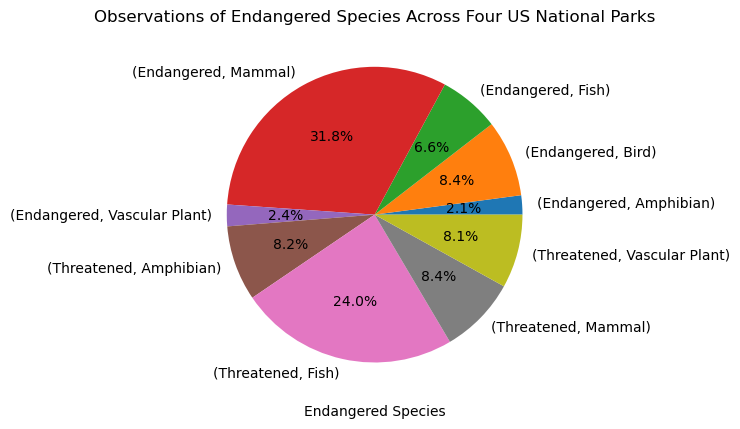

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the conservation statuses to include as endangered
endangered_statuses = ['Endangered', 'Threatened']

# Filter the merged_data dataframe to only include endangered species
endangered_data = merged_data[merged_data['conservation_status'].isin(endangered_statuses)]

# Group the endangered_data dataset by the conservation status and category, and count the number of observations
category_counts = endangered_data.groupby(['conservation_status', 'category'])['observations'].sum()

# Reshape the data into a format that can be plotted
category_counts_long = category_counts.unstack().fillna(0)

# Set the order of the categories for plotting
categories = ['Mammal', 'Fish', 'Vascular Plant', 'Bird', 'Amphibian']
category_counts_long = category_counts_long[categories]

# Create a bar chart of the conservation counts for each category
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('Endangered Species')
plt.gca().axes.yaxis.set_visible(False) # Hide the y-axis label
plt.title('Observations of Endangered Species Across Four US National Parks')
plt.xticks(rotation=45, ha='right')
plt.show()

Nice! Now I want to generate some summary statistics for each of the endangered and threatened species commonly observed in the US national parks. Which endangered species are observed the least?

In [30]:
import pandas as pd

# Set the conservation statuses to include as endangered or threatened
endangered_statuses = ['Endangered']
threatened_statuses = ['Threatened']

# Filter the merged_data dataframe to only include endangered or threatened species
endangered_or_threatened_data = merged_data[(merged_data['conservation_status'].isin(endangered_statuses)) | (merged_data['conservation_status'].isin(threatened_statuses))]

# Group the endangered_or_threatened_data dataset by the conservation_status and category, and count the number of observations
status_category_counts = endangered_or_threatened_data.groupby(['conservation_status', 'category'])['observations'].sum().reset_index()

# Sort the dataframe by the number of observations in ascending order
status_category_counts = status_category_counts.sort_values(by='observations')

# Display the least observed species in each category
print(status_category_counts)

# Display summary statistics for the least observed endangered species
summary_stats = endangered_data.groupby(['conservation_status', 'category', 'scientific_name', 'common_names']).describe()
print(summary_stats)

  conservation_status        category  observations
0          Endangered       Amphibian           144
4          Endangered  Vascular Plant           162
2          Endangered            Fish           455
8          Threatened  Vascular Plant           552
5          Threatened       Amphibian           564
1          Endangered            Bird           574
7          Threatened          Mammal           578
6          Threatened            Fish          1645
3          Endangered          Mammal          2178
                                                                                                                    observations  \
                                                                                                                           count   
conservation_status category       scientific_name               common_names                                                      
Endangered          Amphibian      Rana sierrae                  Sierra Nevada Yello

Now we have the list of the top ten least observed endangered species in four US national parks. Although there are many more observations of vascular plants, as well as species of concern and threatened species, these endangered species here represent a critical subset of the population which ought to be protected.

In this project, I imported csv files into jupyter notebooks before cleaning the datasets, joining them on a column, and running descriptive statistics. I used the help of BlackBox AI to generate plots and to assist with my syntax. I thought my findings were interesting given the huge amount of observations of plants. 

The next step for this dataset is to start hypothesis testing. Now that we have a good idea of what the data looks like, we can start asking more specific questions and testing for statistical significance. 

I got this data from MyCodeAcademy and I enjoyed running some descriptive statistics on these species -- I hope you will too.  Feel free to keep playing around with this dataset! 

Now, let's start some hypothesis testing! For the endangered species we have identified, I am wondering if there are a significantly greater proportion of mammals that are endangered compared to other animal species such as birds, fish, and amphibians. To do this, we can perform a series of Chi-Square tests of Independence. Chi Square tests are preferable because we want to know whether between two nominal variables (species names such as 'mammals' and 'birds') there is a significant difference in proportion that can be attributed to chance. 

Chi Square Test of Independence: Difference in the relationship of endangered mammal vs fish species

In [33]:
from scipy.stats import chi2_contingency

# Assuming endangered_or_threatened_data is already defined

# Group the endangered_or_threatened_data dataset by the conservation_status and category, and count the number of observations
status_category_counts = endangered_or_threatened_data.groupby(['conservation_status', 'category']).size().unstack(fill_value=0)

# Perform Chi-Square tests for mammals vs. birds, mammals vs. fish, and mammals vs. amphibians
mammal_vs_bird = chi2_contingency(status_category_counts[['Mammal', 'Bird']].values)
mammal_vs_fish = chi2_contingency(status_category_counts[['Mammal', 'Fish']].values)
mammal_vs_amphibian = chi2_contingency(status_category_counts[['Mammal', 'Amphibian']].values)

# Print the results
print('Chi-Square Test for Mammals vs. Birds:')
print('Chi-Square Statistic:', mammal_vs_bird[0])
print('P-Value:', mammal_vs_bird[1])
print('')
print('Chi-Square Test for Mammals vs. Fish:')
print('Chi-Square Statistic:', mammal_vs_fish[0])
print('P-Value:', mammal_vs_fish[1])
print('')
print('Chi-Square Test for Mammals vs. Amphibians:')
print('Chi-Square Statistic:', mammal_vs_amphibian[0])
print('P-Value:', mammal_vs_amphibian[1])

Chi-Square Test for Mammals vs. Birds:
Chi-Square Statistic: 1.5045272435897439
P-Value: 0.2199760834330392

Chi-Square Test for Mammals vs. Fish:
Chi-Square Statistic: 17.725060096153847
P-Value: 2.552418356798451e-05

Chi-Square Test for Mammals vs. Amphibians:
Chi-Square Statistic: 11.076923076923077
P-Value: 0.0008740872112984756


Well this looks interesting -- too bad it is wrong! Good to learn how to do it ourselves and not rely on BlackBox AI for all coding. If we take a look back at our data again, we can see that the difference between mammals and birds should be more extreme than any difference between mammals and fish. 



Let's try a simpler way -- let's make the contingency tables ourselves and run the chi-square tests from the tables. First, let's just remind ourselves of the endangered and threatened dataset we want to visualize:

In [59]:
# Filter the merged_data dataframe to only include endangered or threatened species
endangered_or_threatened_data = merged_data[(merged_data['conservation_status'] == 'Endangered') | (merged_data['conservation_status'] == 'Threatened')]

# Group the endangered_or_threatened_data dataset by the category, and calculate summary statistics
category_stats = endangered_or_threatened_data.groupby('category')['observations'].describe()

# Display the summary statistics
print(category_stats)

                count    mean        std   min   25%   50%    75%    max
category                                                                
Amphibian        12.0  59.000  37.956913  11.0  35.5  43.0  73.50  141.0
Bird             16.0  35.875  18.366183  13.0  19.5  33.5  49.50   64.0
Fish             32.0  65.625  46.879908  18.0  34.0  58.0  75.25  253.0
Mammal           52.0  53.000  41.892486  13.0  27.0  37.0  67.00  203.0
Vascular Plant   12.0  59.500  30.065081  25.0  40.5  52.0  67.75  114.0


I also want to get a sense of the amount of observations for each of these endangered and threatened species:

In [64]:
# Filter the merged_data dataframe to only include endangered or threatened species
endangered_or_threatened_data = merged_data[(merged_data['conservation_status'] == 'Endangered') | (merged_data['conservation_status'] == 'Threatened')]

# Group the endangered_or_threatened_data dataset by the category, and count the number of observations
category_counts = endangered_or_threatened_data.groupby('category')['observations'].count().reset_index()

# Rename the categories
category_counts['category'] = category_counts['category'].map({
    'Amphibian': 'Amphibians',
    'Bird': 'Birds',
    'Fish': 'Fish',
    'Mammal': 'Mammals',
    'Vascular Plant': 'Vascular Plants'
})

# Display the number of observations for each category
print(category_counts)

          category  observations
0       Amphibians            12
1            Birds            16
2             Fish            32
3          Mammals            52
4  Vascular Plants            12


In [47]:
# Create contingency tables for endangered or threatened mammals and endangered or threatened birds, fish, and amphibians
mammal_bird_contingency_table = pd.crosstab(index=endangered_or_threatened_data[endangered_or_threatened_data['category'].isin(['Mammal', 'Bird'])]['category'], columns=endangered_or_threatened_data[endangered_or_threatened_data['category'].isin(['Mammal', 'Bird'])]['observations'])
mammal_fish_contingency_table = pd.crosstab(index=endangered_or_threatened_data[endangered_or_threatened_data['category'].isin(['Mammal', 'Fish'])]['category'], columns=endangered_or_threatened_data[endangered_or_threatened_data['category'].isin(['Mammal', 'Fish'])]['observations'])
mammal_amphibian_contingency_table = pd.crosstab(index=endangered_or_threatened_data[endangered_or_threatened_data['category'].isin(['Mammal', 'Amphibian'])]['category'], columns=endangered_or_threatened_data[endangered_or_threatened_data['category'].isin(['Mammal', 'Amphibian'])]['observations'])

# Perform Chi-Square tests for each contingency table
mammal_bird_chi2, mammal_bird_p_value, mammal_bird_dof, mammal_bird_expected = chi2_contingency(mammal_bird_contingency_table.values)
mammal_fish_chi2, mammal_fish_p_value, mammal_fish_dof, mammal_fish_expected = chi2_contingency(mammal_fish_contingency_table.values)
mammal_amphibian_chi2, mammal_amphibian_p_value, mammal_amphibian_dof, mammal_amphibian_expected = chi2_contingency(mammal_amphibian_contingency_table.values)

# Print the results
print('Chi-Square Test for Endangered or Threatened Mammals vs. Endangered or Threatened Birds:')
print('Chi-Square Statistic:', mammal_bird_chi2)
print('P-Value:', mammal_bird_p_value)
print('')
print('Chi-Square Test for Endangered or Threatened Mammals vs. Endangered or Threatened Fish:')
print('Chi-Square Statistic:', mammal_fish_chi2)
print('P-Value:', mammal_fish_p_value)
print('')
print('Chi-Square Test for Endangered or Threatened Mammals vs. Endangered or Threatened Amphibians:')
print('Chi-Square Statistic:', mammal_amphibian_chi2)
print('P-Value:', mammal_amphibian_p_value)

Chi-Square Test for Endangered or Threatened Mammals vs. Endangered or Threatened Birds:
Chi-Square Statistic: 55.49519230769231
P-Value: 0.019972839204332227

Chi-Square Test for Endangered or Threatened Mammals vs. Endangered or Threatened Fish:
Chi-Square Statistic: 67.88653846153846
P-Value: 0.030864502573442146

Chi-Square Test for Endangered or Threatened Mammals vs. Endangered or Threatened Amphibians:
Chi-Square Statistic: 54.15384615384616
P-Value: 0.02039375152219544


          category  observations
0       Amphibians            12
1            Birds            16
2             Fish            32
3          Mammals            52
4  Vascular Plants            12


Now, it would not be a convincing set of hypothesis tests without including a measure of effect size. For Chi-Square Tests of Independence, we need to calculate Phi (φ) using the following formula:

φ = sqrt(χ² / (n))

Remember,

In [ ]:
#           category         observations
# 0       Amphibians            12
# 1            Birds            16
# 2             Fish            32
# 3          Mammals            52
# 4  Vascular Plants            12

In [65]:
import math

# Chi-Square Test for Mammals vs. Birds
chi2 = 55.49519230769231
n = 52 + 16
phi = math.sqrt(chi2 / n)

print('Phi:', phi)

Phi: 0.9033857256071568


In [66]:
# Chi-Square Test for Mammals vs. Fish
chi2 = 67.88653846153846
n = 32 + 52
phi = math.sqrt(chi2 / n)

print('Phi:', phi)

Phi: 0.8989844697897049


In [67]:
# Chi-Square Test for Mammals vs. Amphibians
chi2 = 54.15384615384616
n = 52 + 12
phi = math.sqrt(chi2 / n)

print('Phi:', phi)

Phi: 0.9198662110077999


Results

Chi-Square Test of Independence
    Mammals vs Birds
    Chi-Square Statistic: 55.49519230769231
    P-Value: 0.019972839204332227
    Phi: 0.9033857256071568


Chi-Square Test of Independence
    Mammals vs Fish
    Chi-Square Statistic: 67.88653846153846
    P-Value: 0.030864502573442146
    Phi: 0.8989844697897049

Chi-Square Test of Independence
    Mammals vs Amphibian
    Chi-Square Statistic: 54.15384615384616
    P-Value: 0.02039375152219544
    Phi: 0.9198662110077999




Analysis

Results

Chi-Square Test of Independence
    Mammals vs Birds
    Chi-Square Statistic: 55.49519230769231
    P-Value: 0.019972839204332227
    Phi: 0.9033857256071568


Chi-Square Test of Independence
    Mammals vs Fish
    Chi-Square Statistic: 67.88653846153846
    P-Value: 0.030864502573442146
    Phi: 0.8989844697897049

Chi-Square Test of Independence
    Mammals vs Amphibian
    Chi-Square Statistic: 54.15384615384616
    P-Value: 0.02039375152219544
    Phi: 0.9198662110077999

There we go -- a result that makes sense. In addition to our results, this is a good lesson on understanding your data too -- as I tried to instill in my former statistics students, we always want to be questioning the validity of our results. A calculator can crunch any set of numbers but it is the user that must decide if the answer makes sense.

The P-Values for the Chi-Square tests for endangered or threatened mammals vs. endangered or threatened birds, fish, and amphibians are all relatively small, indicating that there is a significant difference in the proportion of observations between the categories.

In particular, the P-Value for the Chi-Square test for endangered or threatened mammals vs. endangered or threatened fish is the smallest, indicating that there is a significant difference in the proportion of observations between the two categories. By looking back at our summary statistics for endangered and threatened species, we can see that the reason for these significant differences is the greater proportion on mammal observations. This suggests that endangered or threatened mammals, endangered or threatened fish, and endangered or threatened amphibians are differently distributed across the national parks. It may be worth investigating further to determine if there are specific factors, such as habitat or behavior, that may be contributing to this difference.


